In [33]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as mcolors
from matplotlib import colors  # Correct import

In [35]:
Tmax = xr.open_dataset('Ghana_ERA5_dTx_1991_2020.nc').mx2t 
Tmin = xr.open_dataset('Ghana_ERA5_dTn_1991_2020.nc').mn2t

In [38]:
# Calculate mean over the time dimension (1991–2020)
Tmax_mean = Tmax.mean(dim='time')
Tmin_mean = Tmin.mean(dim='time')

In [40]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs, feature
import glob
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.gridspec import SubplotSpec
from __future__ import unicode_literals
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.io import shapereader
from warnings import filterwarnings
filterwarnings('ignore')

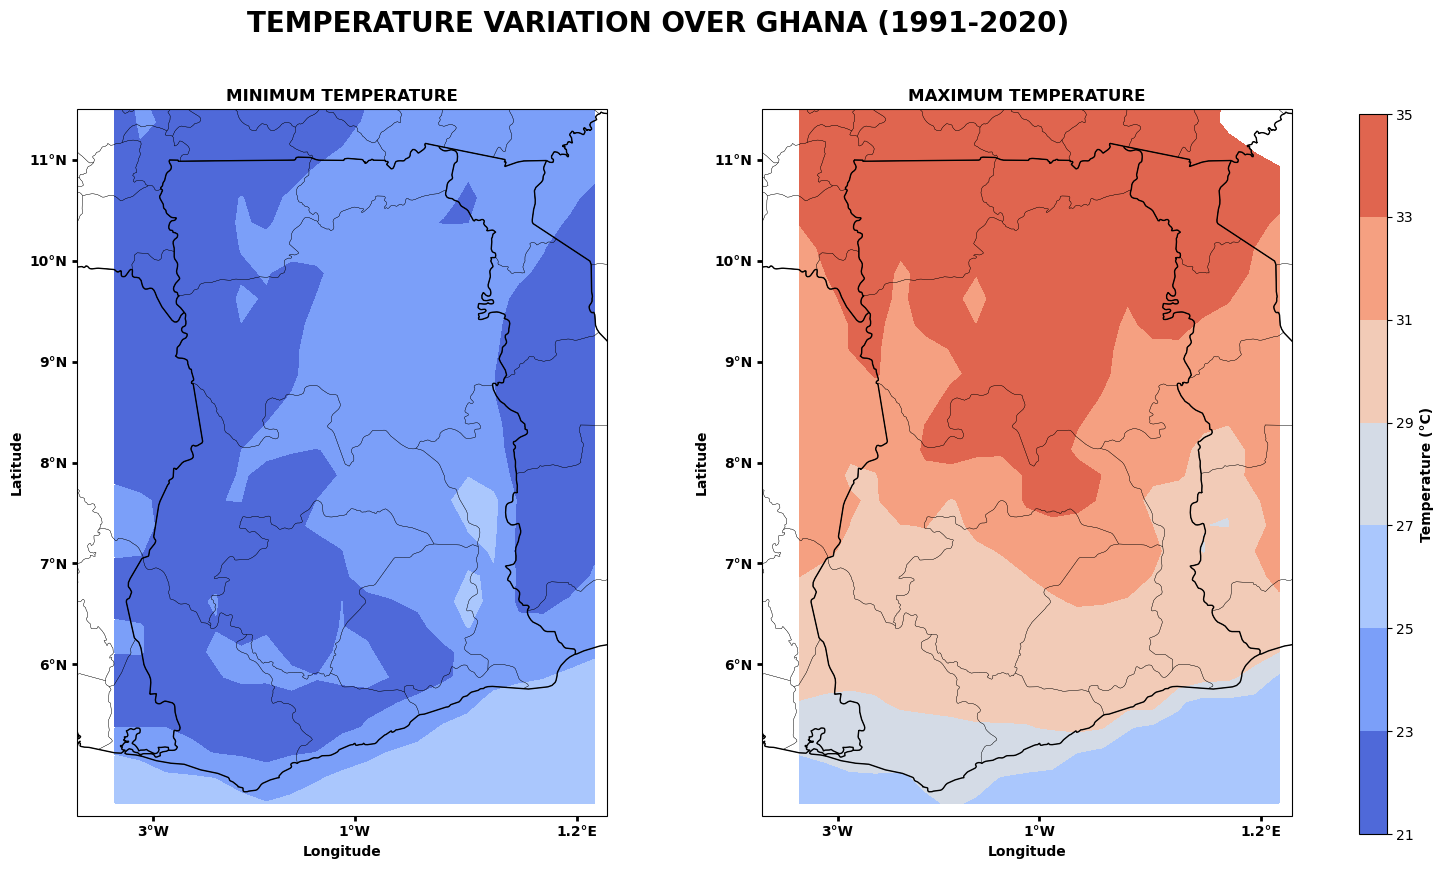

In [58]:
from cartopy import crs, feature
import matplotlib.pyplot as plt
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Assuming Tmin_mean and Tmax_mean are defined and are 2D arrays with .longitude and .latitude attributes
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
bounds = [-3.75, 1.5, 4.5, 11.5]

all_data = [Tmin_mean, Tmax_mean]
data_names = ['MINIMUM TEMPERATURE', 'MAXIMUM TEMPERATURE']

def set_fig_params(axes):
    for i, ax in enumerate(axes):
        ax.set_extent(bounds, crs=crs.PlateCarree())  # Set map bounds
        ax.add_feature(feature.COASTLINE)
        ax.add_feature(feature.BORDERS)
        ax.add_feature(feature.STATES, linewidth=0.2)
        ax.set_xticks([-3, -1, 1.2], crs=crs.PlateCarree())
        ax.set_yticks([11, 10, 9, 8, 7, 6], crs=crs.PlateCarree())
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

        ax.tick_params(axis='both', which='major', labelsize=10, width=2)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 8), subplot_kw={'projection': crs.PlateCarree()})
ax = axes.flatten()
set_fig_params(ax)

# Define levels for contour plotting
levels = np.arange(21, 36, 2)

# Plot each month's mean
for i, month_num in enumerate(range(len(all_data))):  # Adjusted to loop through all data
    cb = ax[i].contourf(all_data[i].longitude, all_data[i].latitude, all_data[i], levels=levels, cmap='coolwarm', transform=crs.PlateCarree(), vmin=21, vmax=36.0)
    ax[i].set_title(data_names[i], fontweight='bold')  # Corrected title
    ax[i].set_xlabel('Longitude', fontweight='bold')
    ax[i].set_ylabel('Latitude', fontweight='bold')

# Add colorbar
cbar_ax = fig.add_axes([1.0, 0.05, 0.02, 0.9])
cbar = plt.colorbar(cb, cax=cbar_ax)
cbar.set_ticks(np.arange(21, 36, 2))
cbar.set_label('Temperature (°C)', fontweight='bold')
plt.tight_layout()
fig.suptitle('TEMPERATURE VARIATION OVER GHANA (1991-2020)', fontweight='bold', fontsize=20, y=1.08)

# Save the figure (uncomment to save)
plt.savefig('T_analysis.png', dpi=300)

plt.show()
